<a href="https://colab.research.google.com/github/kajalkattige30/DLProject/blob/main/TrafficSignRecognitionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identifying Traffic Signs using Deep Learning and PyTorch

Deep Learning is a sub-field of machine learning which can achieve advanced results on computer vision problems. An an example, kaggle dataset - German Traffic Sign Recognition Benchmark has been used which contains 39209 images of traffic signs from 43 different categories.

Steps :
1. Pick a dataset

2. Download the dataset

3. Import the dataset using pytorch

4. Preprocessing

5. Moving the dataset to the GPU
  
6. Defining the model

7. Training the model

8. Make predictions on sample images


### Download the dataset
Using `opendatasets`, download the dataset from https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


In [1]:
!pip install opendatasets --upgrade --quiet


In [2]:
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'

In [4]:
od.download(dataset_url, force = True) 

100%|██████████| 612M/612M [00:02<00:00, 266MB/s]


### Import dataset using pytorch

In [5]:
dir = './gtsrb-german-traffic-sign/Train'

In [6]:
import os

To view classes inside train folder-

In [ ]:
os.listdir(dir)

['3',
 '28',
 '31',
 '26',
 '4',
 '27',
 '24',
 '16',
 '33',
 '41',
 '14',
 '0',
 '15',
 '6',
 '34',
 '36',
 '1',
 '10',
 '30',
 '7',
 '32',
 '39',
 '17',
 '25',
 '37',
 '8',
 '21',
 '38',
 '29',
 '12',
 '9',
 '35',
 '40',
 '18',
 '19',
 '11',
 '5',
 '20',
 '42',
 '2',
 '22',
 '13',
 '23']

In [7]:
len(os.listdir(dir))

43

There are 43 classes in total.

#### Loading the dataset -

In [8]:
from torchvision.datasets import  ImageFolder

ImageFolder class will load the images from the directory

In [9]:
dataset = ImageFolder(dir)

In [10]:
len(dataset)

39209

Training dataset contains 39209 images of traffic signs.

In [11]:
dataset[50]

(<PIL.Image.Image image mode=RGB size=43x43 at 0x7F3A8629D510>, 0)

Dataset consists of PIL images. Above image belongs to class 0.

In [ ]:
dataset.classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

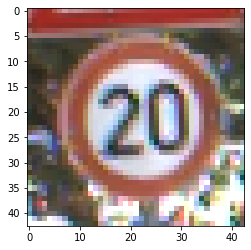

In [13]:
image, label = dataset[50]
plt.imshow(image)

Above plot shows image of dataset[50] before any transformation.

### Preprocessing

Some transformations are applied in order to augent the training data. This is done to improve the performance of the model. Transformations applied are - RandomRotation, RandomHorizontalFlip, RandomVerticalFlip etc.

tt.Compose() is used to apply a bunch of transformations in order. When building a deep learning model, all the images need to be of the same size, so that the model trains faster. tt.RandomCrop() is used to crop the images randomly and introduce some randomization into the dataset. tt.ToTensor() will convert PIL images into tensors.

In [14]:
import torchvision.transforms as tt
transformed_dataset1 = ImageFolder(dir, tt.Compose([ 
                                       tt.RandomRotation(20),  
                                       tt.Resize(64), 
                                       tt.RandomCrop(64),            
                                       tt.ToTensor()]))


In [15]:
import torchvision.transforms as tt
transformed_dataset2 = ImageFolder(dir, tt.Compose([ 
                                       tt.RandomAffine(degrees = 0, translate=(0.2, 0.2), shear=20, scale=(0.8,1.2)),  
                                       tt.Resize(64), 
                                       tt.RandomCrop(64),         
                                       tt.ToTensor()]))

In [16]:
import torchvision.transforms as tt
transformed_dataset3 = ImageFolder(dir, tt.Compose([  
                                       tt.RandomHorizontalFlip(p=0.5), 
                                       tt.Resize(64), 
                                       tt.RandomCrop(64),         
                                       tt.ToTensor()]))

In [17]:
import torchvision.transforms as tt
transformed_dataset4 = ImageFolder(dir, tt.Compose([ 
                                       tt.RandomVerticalFlip(p=0.5),
                                       tt.Resize(64), 
                                       tt.RandomCrop(64),             
                                       tt.ToTensor()]))

In [18]:
import torchvision.transforms as tt
dataset = ImageFolder(dir, tt.Compose([
                                       tt.Resize(64), 
                                       tt.RandomCrop(64),
                                       tt.ToTensor()]))

In [19]:
from torch.utils.data import  ConcatDataset
from torchvision.datasets import  ImageFolder
data = []
data.append(dataset)
data.append(transformed_dataset1)
data.append(transformed_dataset2)
data.append(transformed_dataset3)
data.append(transformed_dataset4)

data = ConcatDataset(data)

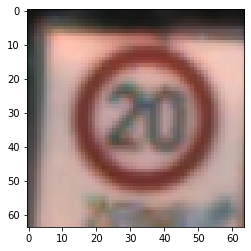

In [20]:
img, label = data[100]
plt.imshow(img.permute(1, 2, 0))

In [21]:
len(data)

196045

Above plot shows image of dataset[20] after applying transformations.

#### Splitting the dataset into two parts - Validation and Training dataset.

In [22]:
val_percent = 0.1
val_size = int(val_percent*len(data))
train_size = len(data) - val_size
train_size, val_size

(176441, 19604)

Number of training examples = 176441

Number of validation examples = 19604

Image data shape = (64, 64)

Number of classes = 43

In [23]:
from torch.utils.data import random_split

train_dataset, val_dataset = random_split(data, [train_size, val_size])
len(train_dataset), len(val_dataset)

(176441, 19604)

Next step is to create dataloaders, to work with data in batches.



In [24]:
from torch.utils.data import DataLoader
batch_size = 64 # Creating batches of 64
train_DataLoader = DataLoader(train_dataset, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_DataLoader = DataLoader(val_dataset, batch_size, num_workers = 4, pin_memory = True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [25]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


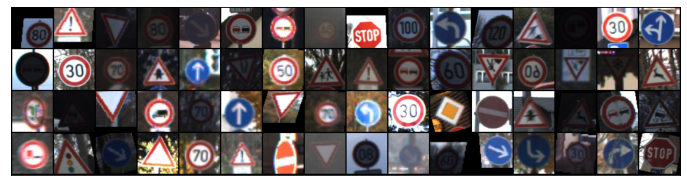

In [26]:
show_batch(train_DataLoader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


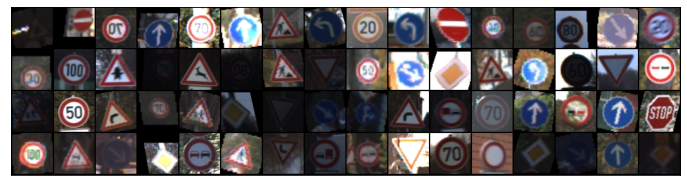

In [27]:
show_batch(val_DataLoader)

### Utility Functions and Classes
GPU utilities

helper functions to move the data onto the gpu.



In [28]:
import torch
def get_default_device(): # This function is going to pick a gpu if one is available, otherwise it's going to pick a cpu, it will give a pointer to a device based on what is available.
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device): # This function is used to move data to a particular device.
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader(): # This function is used to wrap dataloaders so that when batches of data are being requested, they are dynamically loaded onto the gpu
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

To check if gpu is available

In [29]:
import torch
torch.cuda.is_available()

True

To find device:

In [30]:
device = get_default_device()
device

device(type='cuda')

Cuda is the language that is used to communicate with the gpu => have access to the gpu.

In [31]:
img, label = data[0]

In [32]:
img

tensor([[[0.2941, 0.2941, 0.2902,  ..., 0.2549, 0.2588, 0.2588],
         [0.2980, 0.2980, 0.2941,  ..., 0.2627, 0.2667, 0.2706],
         [0.3137, 0.3098, 0.3059,  ..., 0.2863, 0.2902, 0.2941],
         ...,
         [0.4471, 0.4431, 0.4314,  ..., 0.3961, 0.3882, 0.3843],
         [0.3725, 0.3725, 0.3686,  ..., 0.4078, 0.3882, 0.3765],
         [0.3490, 0.3529, 0.3569,  ..., 0.4000, 0.3765, 0.3686]],

        [[0.3059, 0.3059, 0.3020,  ..., 0.2667, 0.2627, 0.2627],
         [0.3098, 0.3098, 0.3059,  ..., 0.2745, 0.2706, 0.2706],
         [0.3216, 0.3176, 0.3137,  ..., 0.2941, 0.2941, 0.2941],
         ...,
         [0.4549, 0.4549, 0.4510,  ..., 0.4118, 0.4078, 0.4039],
         [0.3882, 0.3882, 0.3922,  ..., 0.4275, 0.4157, 0.4078],
         [0.3569, 0.3647, 0.3765,  ..., 0.4157, 0.4039, 0.3961]],

        [[0.3137, 0.3137, 0.3098,  ..., 0.2627, 0.2588, 0.2588],
         [0.3176, 0.3176, 0.3137,  ..., 0.2706, 0.2667, 0.2667],
         [0.3294, 0.3255, 0.3216,  ..., 0.2863, 0.2863, 0.

To see image transformation -

In [33]:
img.shape

torch.Size([3, 64, 64])

In [34]:
img.device

device(type='cpu')

Above command is to check device, by default it on cpu

To move image tensor to a device :

In [35]:
img_gpu = to_device(img, device)
img_gpu.device

device(type='cuda', index=0)

Wrapping our dataloaders with the device. Whenever batches are requested, those batches of data will be on the gpu.

In [36]:
train_DataLoader = DeviceDataLoader(train_DataLoader, device)
val_DataLoader = DeviceDataLoader(val_DataLoader, device)

### Model and Training utilities


In [37]:
import torch.nn as nn
import torch.nn.functional as F
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
      "calculate loss for a batch of training data"
      images, labels = batch 
      out = self(images)                  # Generate predictions
      loss = F.cross_entropy(out, labels) # Calculate loss
      return loss
    
    def validation_step(self, batch):
      "calculate loss and accuracy for a batch of validation data"
      images, labels = batch 
      out = self(images)                    # Generate predictions
      loss = F.cross_entropy(out, labels)   # Calculate loss
      acc = accuracy(out, labels)           # Calculate accuracy
      return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs): #This function gives the overall loss and overall accuracy for validation set
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result): #Print information at the end of each epoch
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [38]:
@torch.no_grad()
def evaluate(model, val_loader):
  """evaluates the model's performance on the validation set"""
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD): # actual training loop which performs gradient descent
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch) # loss for each batch on training data 
            train_losses.append(loss)
            loss.backward() # to calculate gradients
            optimizer.step() # performs gradient descent and updates the weights of the model
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

### Model

In [39]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)
    
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input : 64 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # 64 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 64 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) # 64 x 128 x 32 x 32, # 64 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # 64 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 64 x 512 x 8 x 8
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))# 64 x 512 x 8 x 8, # 64 x 512 x 8 x 8
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 64 x 512 x 1 x 1
                                        nn.Flatten(), # 64 x 512 # Now size is changed to 128 x 512
                                        nn.Dropout(0.2), # Dropout doesn't change anything
                                        nn.Linear(512, num_classes)) # Linear layer only access 512 input
       
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

### Instantiating the model

In [40]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

For the first convolutional layer, weights of the convolutional layer are on the device CUDA



In [41]:
model.conv1[0].weight.device

device(type='cuda', index=0)

Passing one batch of input tensors through the model


In [42]:
torch.cuda.empty_cache()
for batch in train_DataLoader:
  img, labels = batch
  print('images.shape', img.shape)
  print('images.device', img.device)
  preds = model(img)
  print('preds.shape', preds.shape)
  # print(preds)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape torch.Size([64, 3, 64, 64])
images.device cuda:0
preds.shape torch.Size([64, 43])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


For each image, we are getting 43 outputs, and in image classfication the 43 outputs are interpreted as the probabilities of the 43 classes. Class with highest probability is taken as result.

### Training

In [43]:
history = [evaluate(model, val_DataLoader)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.08114820718765259, 'val_loss': 3.757014751434326}]

In [44]:
history += fit(5, 0.001, model, train_DataLoader, val_DataLoader, torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.3975, val_loss: 0.0327, val_acc: 0.9903
Epoch [1], train_loss: 0.0579, val_loss: 0.0583, val_acc: 0.9837
Epoch [2], train_loss: 0.0369, val_loss: 0.0446, val_acc: 0.9881
Epoch [3], train_loss: 0.0252, val_loss: 0.0333, val_acc: 0.9919
Epoch [4], train_loss: 0.0236, val_loss: 0.0181, val_acc: 0.9949


accuracy = 99.49%

### Test with individual images

In [49]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [50]:
def show_image_prediction(img, label):
  plt.imshow(img.permute((1, 2, 0)))
  pred = predict_image(img, model, dataset.classes)
  print('Target:', dataset.classes[label])
  print('Prediction:', pred)


Target: 1
Prediction: 1


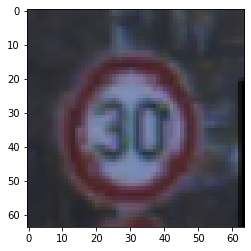

In [52]:
show_image_prediction(*val_dataset[800])